<center>
<h1> Assignment 2: Multi-Classification</h1>
<hr>
<h2> Handwritten Digits Image Classification </h2>
<hr>
<h3> MCIS 6283-Machine Learning </h3>

<h3><mark>Due date: May 2, 2024, 11.59 pm</mark></h3>
<h3>Total Points: 100</h3>

<h4>Instructor: Dr. Mohammad Bhuiyan</h4>


</center>

### Please put your name, student ID, date and time here 
* Name:varshitha veeramachaneni
* Student ID:9999-03487
* Date:4/27/24


* In this assignment, you will investigate the handwritten digits dataset.

* Please apply the folowing eight methods to classify the handwritten digits dataset.
* Split the dataset into training sets and test sets
* Fit the training data sets to the following eight algorithms
* Print the classification report on the test data sets

<h4>Method 1: KNN</h4>
<h4>Method 2: Linear SVM</h4>
<h4>Method 3: Gaussian Kernel SVM</h4>
<h4>Method 4: Naive Bayes</h4>

In [1]:
# Importing the dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

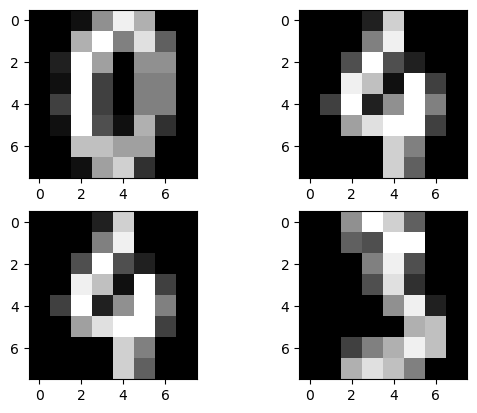

In [2]:
import matplotlib.pyplot as plt
digits.images[0].shape
list = [10,100,100,45]
fig = plt.figure()
for i,j in enumerate(list):
    plt.subplot(2,2,i+1)
    plt.imshow(digits.images[j],cmap='gray')

In [3]:
X =  digits.data
y =  digits.target

## Step 1. Split the dataset into training data and testing data (<mark>10 points</mark>)

Shape of X_train: (1437, 64)
Shape of X_test: (360, 64)
Shape of y_train: (1437,)
Shape of y_test: (360,)


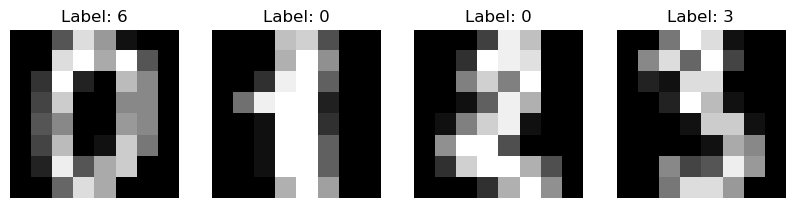

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
def plot_images(images, labels, rows=1, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(digits.images[i],cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
plot_images(X_train[:10], y_train[:10])
plt.show()

## Step 2. Algorithm Analysis (<mark>80 points</mark>)

## Method 1. KNN

Accuracy for KNN  : 0.9861111111111112


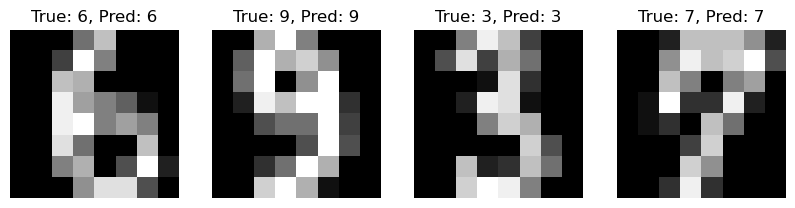

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def knn(X_train, y_train, X_test, k=5):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred
k = 5
y_pred = knn(X_train, y_train, X_test, k)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for KNN ", ":", accuracy)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

Weighted Precision for KNN: 0.9861869867863546


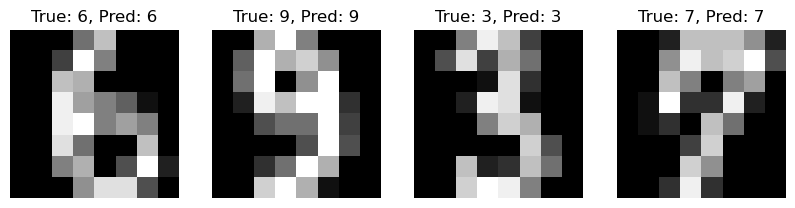

In [6]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

y_pred = knn(X_train, y_train, X_test, k)
precision = precision_score(y_test, y_pred, average='weighted')
print("Weighted Precision for KNN:", precision)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


Weighted Recall for KNN: 0.9861111111111112


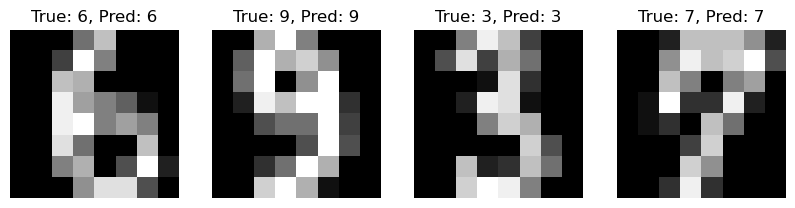

In [7]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

def knn(X_train, y_train, X_test, k=5):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred
k = 5
y_pred = knn(X_train, y_train, X_test, k)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Weighted Recall for KNN:", recall)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


## Method 2. Linear SVM

Accuracy for Linear SVM: 0.9777777777777777


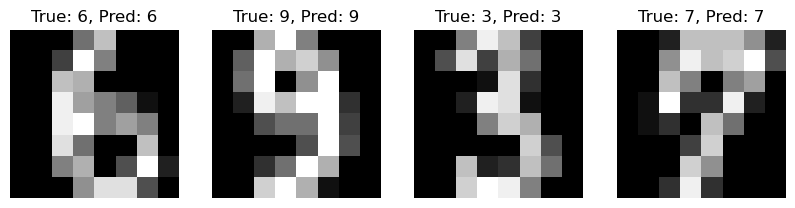

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)
y_pred_train = linear_svm_model.predict(X_train)
y_pred_test = linear_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy for Linear SVM:", test_accuracy)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


Weighted Precision for Linear SVM: 0.9778736953613801


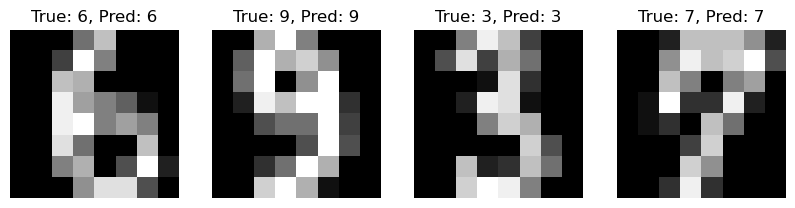

In [9]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

linear_svm_model.fit(X_train, y_train)
y_pred_train = linear_svm_model.predict(X_train)
y_pred_test = linear_svm_model.predict(X_test)
precision_test, _, _, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
print("Weighted Precision for Linear SVM:", precision_test)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


Weighted Recall for Linear SVM: 0.9778736953613801


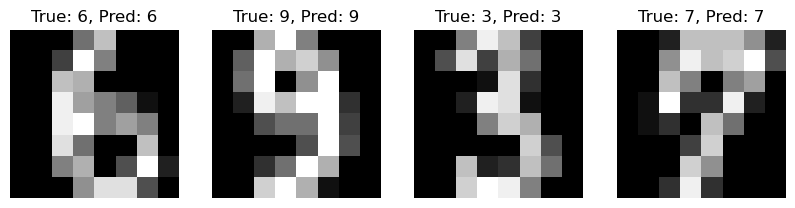

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)
y_pred_train = linear_svm_model.predict(X_train)
y_pred_test = linear_svm_model.predict(X_test)
recall_test, _, _, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
print("Weighted Recall for Linear SVM:", recall_test)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


## Method 3. Gaussian Kernal SVM

Accuracy for Gaussian Kernel SVM: 0.9861111111111112


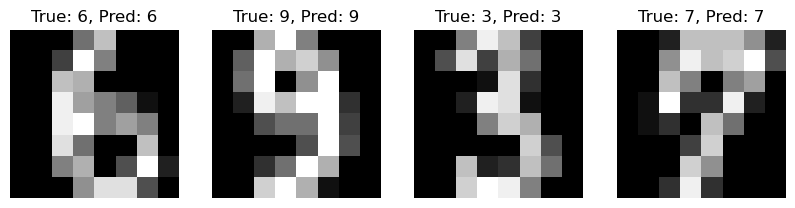

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Gaussian Kernel SVM:", accuracy)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


Weighted Precision for Gaussian Kernel SVM: 0.9861882716049383


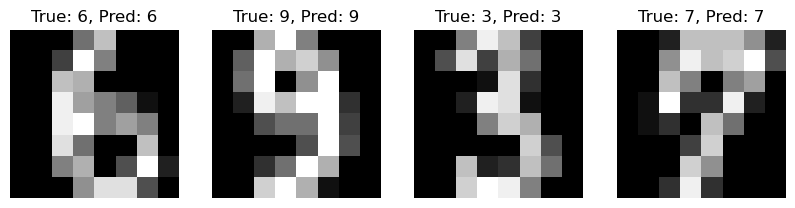

In [12]:
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test)
precision, _, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Weighted Precision for Gaussian Kernel SVM:", precision)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


Weighted Recall for Gaussian Kernel SVM: 0.9861111111111112


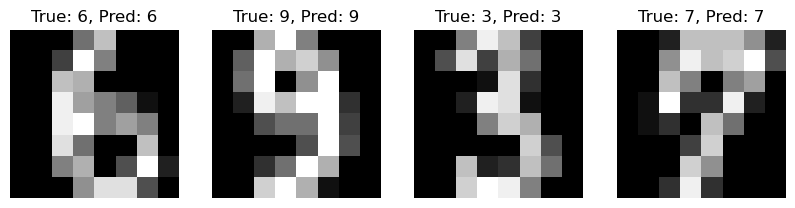

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Weighted Recall for Gaussian Kernel SVM:", recall)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


## Method 4. Naive Bayes

Accuracy for Navie Bayes: 0.8472222222222222


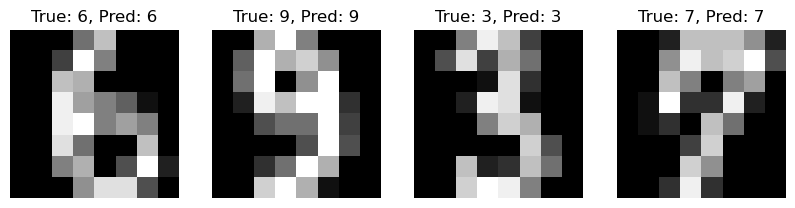

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for Navie Bayes:", accuracy)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


Weighted Precision for Navie Bayes: 0.8750603074057791


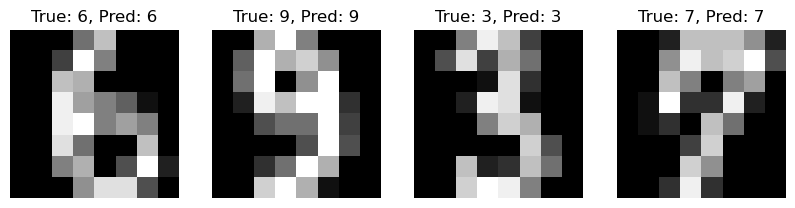

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
precision, _, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Weighted Precision for Navie Bayes:", precision)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


Weighted Recall for Naive Bayes: 0.8472222222222222


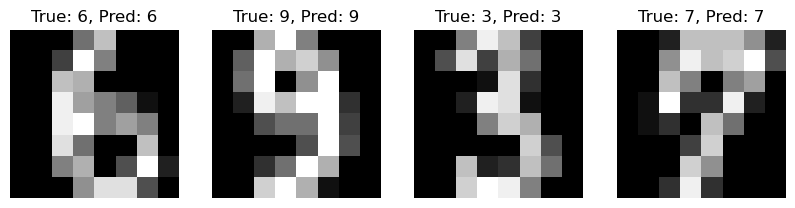

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Weighted Recall for Naive Bayes:", recall)
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()


## Step 3: Accuracy Results Table (<mark>8 points</mark>)

Results Table
                         KNN     L_SVM   RBF_SVM        NB
Accuracy            0.986111  0.977778  0.986111  0.847222
Weighted Precision  0.986187  0.977874  0.986188  0.875060
Weighted Recall     0.986111  0.977778  0.986111  0.847222


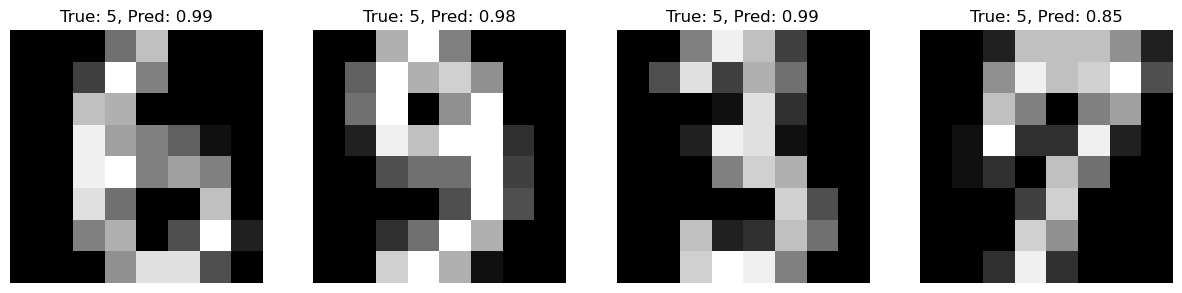

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
linear_svm = SVC(kernel='linear')
gaussian_svm = SVC(kernel='rbf')
naive_bayes = GaussianNB()
classifiers = {
    'KNN': knn,
    'L_SVM': linear_svm,
    'RBF_SVM': gaussian_svm,
    'NB': naive_bayes
}
results = {}
for model, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    results[model] = {'Accuracy': accuracy, 'Weighted Precision': precision, 'Weighted Recall': recall}
results_df = pd.DataFrame(results)
print("Results Table")
print(results_df)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, (model, ax) in enumerate(zip(classifiers.keys(), axes.flat)):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.axis('off')
    ax.set_title(f"True: {true_val}, Pred: {results_df.loc['Accuracy', model]:.2f}")
plt.show()


## Step 4: Conclusion (Write the comparison in one paragraph) (<mark>2 Points</mark>)

In [ ]:
The comparison of the four models on the digits dataset. The KNN and Gaussian Kernal SVM models has highest accuracy, both achieving around 98.6%.They are considered effective and top-performing models.The Linear SVM has accuracy of 97.8%.The Naive Bayes classifier has lower accuracy at 84.7%. These results suggest that for this specific dataset, KNN and Gaussian Kernal SVM models perform well, when compared to linear SVM and Naive Bayes in terms of classification accuracy.

True refers to the true label of a digit image, while pred refers to the predicted label assigned to that image by the respective classifier.Each subplot represents an individual digit image from the test set. The true label(True: {y_test[i]}) indicates the actual digit represented by the image, The predicted label(Pred:{y_pred[i]}) indicates the digit predicted by the classifier for that image. This shows the correspondence between the true and predicted labels for a hand written digits dataset of the test data.

